In [1]:
%matplotlib inline
import xarray as xr
#import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import cartopy
import matplotlib.colors

**PNC:/Users/haas/opt/anaconda3/envs/plotting/lib/python3.8/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  pyproj could not be found, so IO/API coordinates cannot be converted to lat/lon; to fix, install pyproj or basemap (e.g., `pip install pyproj)`


In [2]:
! date


Thu Oct 28 16:17:58 CEST 2021


In [3]:
Scenarios = ["station", "era5"]

Vars = ["sc_aN_n2o_emis",
        "sc_aN_no_emis",
        "sc_aN_n2_emis",
        "sc_aN_nh3_emis",
        "sc_aN_no3_leach",
        "ha_dN_fru_export",
        "ha_dN_straw_export", 
        "cu_dN_fru_export",
        "cu_dN_lst_export",
        "cu_dN_fol_export",
        "fe_dN_fertilizer",
        "ma_dN_manure",
        "es_aN_fixation",
        "es_aN_deposition"]

scen = Scenarios[0]
Files = {}
for v in Vars:
    var = v[3:]
    prefix = v.split("_")[0]
    print(f"{var}, '{prefix}'" )
    Files[v] = f"total_{prefix}_{var}_{scen}.csv"
    print(v, Files[v] )
#

print(Files)

aN_n2o_emis, 'sc'
sc_aN_n2o_emis total_sc_aN_n2o_emis_station.csv
aN_no_emis, 'sc'
sc_aN_no_emis total_sc_aN_no_emis_station.csv
aN_n2_emis, 'sc'
sc_aN_n2_emis total_sc_aN_n2_emis_station.csv
aN_nh3_emis, 'sc'
sc_aN_nh3_emis total_sc_aN_nh3_emis_station.csv
aN_no3_leach, 'sc'
sc_aN_no3_leach total_sc_aN_no3_leach_station.csv
dN_fru_export, 'ha'
ha_dN_fru_export total_ha_dN_fru_export_station.csv
dN_straw_export, 'ha'
ha_dN_straw_export total_ha_dN_straw_export_station.csv
dN_fru_export, 'cu'
cu_dN_fru_export total_cu_dN_fru_export_station.csv
dN_lst_export, 'cu'
cu_dN_lst_export total_cu_dN_lst_export_station.csv
dN_fol_export, 'cu'
cu_dN_fol_export total_cu_dN_fol_export_station.csv
dN_fertilizer, 'fe'
fe_dN_fertilizer total_fe_dN_fertilizer_station.csv
dN_manure, 'ma'
ma_dN_manure total_ma_dN_manure_station.csv
aN_fixation, 'es'
es_aN_fixation total_es_aN_fixation_station.csv
aN_deposition, 'es'
es_aN_deposition total_es_aN_deposition_station.csv
{'sc_aN_n2o_emis': 'total_sc_aN_n2o_e

In [4]:
dfSC = pd.read_csv("total_sc_aN_n2o_emis_era5.csv")
dfSC
dfN = dfSC
dfN.set_index(["year","id"], inplace=True)
dfN.rename(columns = {"aN_n2o_emis[kgNha-1]" : "x"} )
print(dfN.head())

for v in Vars:
    var = v[3:]
    print(v, var)
    df = pd.read_csv(Files[v])
    df.set_index(["year","id"], inplace=True)
    #print(df.head(n=2))
    dfN[v] = df
#
print()
print(dfN.head())


         aN_n2o_emis[kgNha-1]
year id                      
2009 0             889.046396
     1           61086.116840
     2              33.681018
     3              33.681018
     4             101.043054
sc_aN_n2o_emis aN_n2o_emis
sc_aN_no_emis aN_no_emis
sc_aN_n2_emis aN_n2_emis
sc_aN_nh3_emis aN_nh3_emis
sc_aN_no3_leach aN_no3_leach
ha_dN_fru_export dN_fru_export
ha_dN_straw_export dN_straw_export
cu_dN_fru_export dN_fru_export
cu_dN_lst_export dN_lst_export
cu_dN_fol_export dN_fol_export
fe_dN_fertilizer dN_fertilizer
ma_dN_manure dN_manure
es_aN_fixation aN_fixation
es_aN_deposition aN_deposition

         aN_n2o_emis[kgNha-1]  sc_aN_n2o_emis  sc_aN_no_emis  sc_aN_n2_emis  \
year id                                                                       
2009 0             889.046396      889.046396     257.933060    21794.63160   
     1           61086.116840    61086.116840   19117.724164   603685.67840   
     2              33.681018       33.681018      11.382168      259

In [5]:

dfN["N_OUT_Ngases"] = dfN["sc_aN_n2o_emis"] + dfN["sc_aN_no_emis"] + dfN["sc_aN_n2_emis"] + dfN["sc_aN_nh3_emis"]

dfN["N_OUTPUT"] = (dfN["N_OUT_Ngases"] + 
                   dfN["sc_aN_no3_leach"] + 
                   dfN["ha_dN_fru_export"] + 
                    dfN["ha_dN_straw_export"] + 
                    dfN["cu_dN_fru_export"] + 
                    dfN["cu_dN_lst_export"] + 
                    dfN["cu_dN_fol_export"] )

dfN["N_IN_fert"] = dfN["fe_dN_fertilizer"]  
dfN["N_IN_manure"]  = dfN["ma_dN_manure"]
dfN["N_IN_bnf"]  = dfN["es_aN_fixation"] 
dfN["N_IN_deposition"]  = dfN["es_aN_deposition"] 
       


dfN["N_INPUT"] = dfN["N_IN_fert"] + dfN["N_IN_manure"] + dfN["N_IN_bnf"] + dfN["N_IN_deposition"] 

print(dfN.head())

dfN.reset_index(inplace=True)

         aN_n2o_emis[kgNha-1]  sc_aN_n2o_emis  sc_aN_no_emis  sc_aN_n2_emis  \
year id                                                                       
2009 0             889.046396      889.046396     257.933060    21794.63160   
     1           61086.116840    61086.116840   19117.724164   603685.67840   
     2              33.681018       33.681018      11.382168      259.44114   
     3              33.681018       33.681018      11.382168      259.44114   
     4             101.043054      101.043054      34.146504      778.32342   

         sc_aN_nh3_emis  sc_aN_no3_leach  ha_dN_fru_export  \
year id                                                      
2009 0     12755.248800        14.616896               0.0   
     1    563455.097800    214811.270100               0.0   
     2       162.858612       865.738440               0.0   
     3       162.858612       865.738440               0.0   
     4       488.575836      2597.215320               0.0   

         ha

In [6]:
dfN["N_OUTPUT"].groupby(dfN.year, axis=0).sum(axis=0)

year
2009    5.700287e+07
2010    7.404814e+07
2011    6.061264e+07
2012    6.249420e+07
2013    6.003609e+07
2014    6.285117e+07
2015    6.372090e+07
2016    6.633378e+07
Name: N_OUTPUT, dtype: float64

In [14]:
dfN["N_INPUT"].groupby(dfN.year, axis=0).sum(axis=0)

year
2009    5.570582e+07
2010    7.185728e+07
2011    6.522021e+07
2012    6.622491e+07
2013    6.393868e+07
2014    6.980665e+07
2015    7.189986e+07
2016    7.045518e+07
Name: N_INPUT, dtype: float64

In [7]:
Ninput = dfN["N_INPUT"].groupby(dfN.year, axis=0).sum(axis=0).mean()
Ninputstd = dfN["N_INPUT"].groupby(dfN.year, axis=0).sum(axis=0).std()
Noutput = dfN["N_OUTPUT"].groupby(dfN.year, axis=0).sum(axis=0).mean()
Noutputstd = dfN["N_OUTPUT"].groupby(dfN.year, axis=0).sum(axis=0).std()

print(f"Average Anual Nitrogen Balance (2000 - 2010)\n")
print(f"Input:  {Ninput:12.0f} std: {Ninputstd:12.0f}")
print(f"Output: {Noutput:12.0f} std: {Noutputstd:12.0f}")
print(f"Diff:   {(Ninput - Noutput):12.0f}\n")

NNO = dfN["sc_aN_no_emis"].groupby(dfN.year, axis=0).sum(axis=0).mean()
NN2O = dfN["sc_aN_n2o_emis"].groupby(dfN.year, axis=0).sum(axis=0).mean()
NN2 = dfN["sc_aN_n2_emis"].groupby(dfN.year, axis=0).sum(axis=0).mean()
NNH3 = dfN["sc_aN_nh3_emis"].groupby(dfN.year, axis=0).sum(axis=0).mean()
NNgases = dfN["N_OUT_Ngases"].groupby(dfN.year, axis=0).sum(axis=0).mean()
NNO3 =  dfN["sc_aN_no3_leach"].groupby(dfN.year, axis=0).sum(axis=0).mean()
Nyield = (dfN["ha_dN_fru_export"].groupby(dfN.year, axis=0).sum(axis=0).mean() +
          dfN["cu_dN_fru_export"].groupby(dfN.year, axis=0).sum(axis=0).mean())
Nstraw = (dfN["ha_dN_straw_export"].groupby(dfN.year, axis=0).sum(axis=0).mean() +
          dfN["cu_dN_lst_export"].groupby(dfN.year, axis=0).sum(axis=0).mean() +
          dfN["cu_dN_fol_export"].groupby(dfN.year, axis=0).sum(axis=0).mean())
print("LandscapeDNDC")

print(f"Outputs: ")
print(f"\tNO      {NNO:12.0f}")
print(f"\tN2O     {NN2O:12.0f}")
print(f"\tN2      {NN2:12.0f}")
print(f"\tNH3     {NNH3:12.0f}")
print(f"\tN-gases {NNgases:12.0f}")
print(f"\tNO3     {NNO3:12.0f}")
print(f"\tN-yield {Nyield:12.0f}")
print(f"\tN-straw {Nstraw:12.0f}")  

Nfert = dfN["N_IN_fert"].groupby(dfN.year, axis=0).sum(axis=0).mean()
Nmanure = dfN["N_IN_manure"].groupby(dfN.year, axis=0).sum(axis=0).mean()
Nbnf = dfN["N_IN_bnf"].groupby(dfN.year, axis=0).sum(axis=0).mean()
Ndeposition = dfN["N_IN_deposition"].groupby(dfN.year, axis=0).sum(axis=0).mean()

print(f"Inputs: ")
print(f"\tN-fert  {Nfert:12.0f}")
print(f"\tN-manu  {Nmanure:12.0f}")
print(f"\tN-bnf   {Nbnf:12.0f}")
print(f"\tN-depos {Ndeposition:12.0f}\n")

Average Anual Nitrogen Balance (2000 - 2010)

Input:      66888574 std:      5451299
Output:     63387472 std:      5116107
Diff:        3501102

LandscapeDNDC
Outputs: 
	NO           1048224
	N2O           776669
	N2           7925103
	NH3         15633377
	N-gases     25383372
	NO3          2532804
	N-yield     18128305
	N-straw     17342991
Inputs: 
	N-fert      25421198
	N-manu      25415840
	N-bnf       14101715
	N-depos      1949821



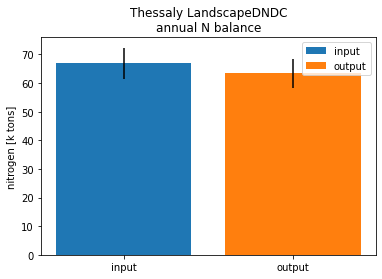

In [9]:
plt.figure()
x = [0,1]
plt.bar(0, Ninput * 1e-6, yerr=Ninputstd* 1e-6, label="input")
plt.bar(1, Noutput * 1e-6, yerr=Noutputstd* 1e-6, label="output")
plt.title(f"Thessaly LandscapeDNDC\nannual N balance")
plt.xticks(x, ('input', 'output'))
plt.ylabel("nitrogen [k tons]")
plt.legend()
plt.savefig("fig_bars_in_vs_out_.pdf")
plt.show()

63.38747193037036


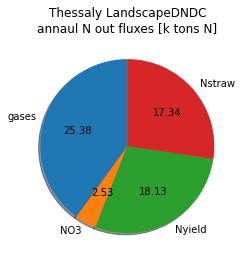

In [10]:
plt.figure()
total = (NNgases+ NNO3+ Nyield+ Nstraw)  * 1e-6 
print(total)

plt.pie([NNgases * 1e-6, NNO3 * 1e-6, Nyield * 1e-6, Nstraw * 1e-6],  autopct=lambda p: '{:.2f}'.format(p * total /100.),  
        labels=["gases", "NO3", "Nyield", "Nstraw"],
        shadow=True, startangle=90)
plt.title(f"Thessaly LandscapeDNDC\nannaul N out fluxes [k tons N]")
plt.savefig("fig_out_fluxes-main.pdf")
plt.show()

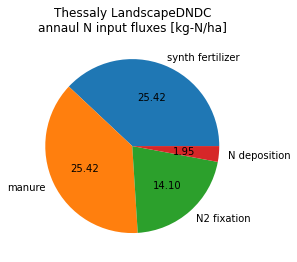

In [11]:
plt.figure()
total = (Nfert + Nmanure + Nbnf + Ndeposition )   * 1e-6
plt.pie([Nfert * 1e-6, Nmanure * 1e-6, Nbnf * 1e-6, Ndeposition * 1e-6] , autopct=lambda p: '{:.2f}'.format(p * total /100.),  labels=["synth fertilizer", "manure", "N2 fixation","N deposition"])
plt.title(f"Thessaly LandscapeDNDC\nannaul N input fluxes [kg-N/ha]")
plt.savefig("fig_in_fluxes.pdf")

plt.show()

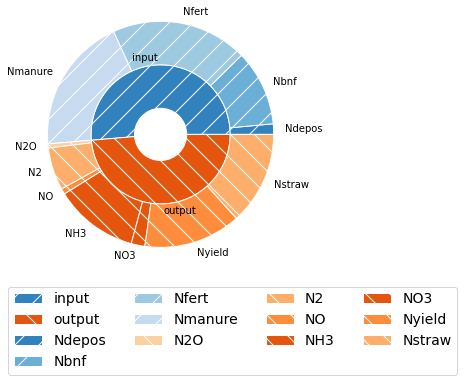

In [12]:
fig, ax = plt.subplots()

size = 0.5
valsouter = np.array([Ninput,Noutput])
valsinner = np.array([Ndeposition, Nbnf, Nfert,Nmanure,NN2O,NN2,NNO,NNH3,NNO3,Nyield,Nstraw])
totalin = sum(valsinner)
totalout = sum(valsouter)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0,4]))
inner_colors = cmap(np.array([0, 1, 2, 3, 7, 6, 5, 4, 4,5,6,7]))

patches, wedges = ax.pie(valsouter, radius=1.3-size, colors=outer_colors, 
                         wedgeprops=dict(width=size, edgecolor='w'), 
                         labels = ["input", "output"])
patches[0].set_hatch('/')
patches[1].set_hatch('\\')
patches, wedges = ax.pie(valsinner, radius=1.3, colors=inner_colors, 
                         wedgeprops=dict(width=size, edgecolor='w'), 
       labels = ["Ndepos","Nbnf","Nfert","Nmanure","N2O","N2","NO","NH3","NO3","Nyield","Nstraw"])
patches[0].set_hatch('/')
patches[1].set_hatch('/')
patches[2].set_hatch('/')
patches[3].set_hatch('/')
patches[4].set_hatch('\\')
patches[5].set_hatch('\\')
patches[6].set_hatch('\\')
patches[7].set_hatch('\\')
patches[8].set_hatch('\\')
patches[9].set_hatch('\\')
patches[10].set_hatch('\\')


#ax.set(aspect="equal", title='N balance')
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['font.size'] = 14
plt.rcParams['patch.edgecolor'] = 'white' 
plt.legend(ncol=4, bbox_to_anchor=(-.2, -.2), loc='upper left', borderaxespad=0. )
plt.savefig("fig_N-balance.pdf")
plt.show()

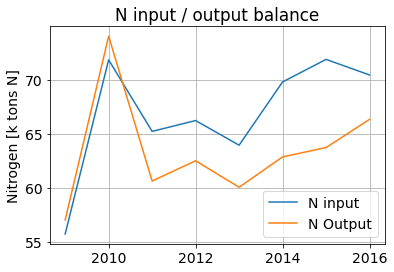

In [22]:
Ninput = dfN["N_INPUT"].groupby(dfN.year, axis=0).sum(axis=0)
Noutput = dfN["N_OUTPUT"].groupby(dfN.year, axis=0).sum(axis=0)

NNO = dfN["sc_aN_no_emis"].groupby(dfN.year, axis=0).sum(axis=0) 
NN2O = dfN["sc_aN_n2o_emis"].groupby(dfN.year, axis=0).sum(axis=0) 
NN2 = dfN["sc_aN_n2_emis"].groupby(dfN.year, axis=0).sum(axis=0) 
NNH3 = dfN["sc_aN_nh3_emis"].groupby(dfN.year, axis=0).sum(axis=0) 
NNgases = dfN["N_OUT_Ngases"].groupby(dfN.year, axis=0).sum(axis=0) 
NNO3 =  dfN["sc_aN_no3_leach"].groupby(dfN.year, axis=0).sum(axis=0) 
Nyield = (dfN["ha_dN_fru_export"].groupby(dfN.year, axis=0).sum(axis=0)  +
          dfN["cu_dN_fru_export"].groupby(dfN.year, axis=0).sum(axis=0) )
Nstraw = (dfN["ha_dN_straw_export"].groupby(dfN.year, axis=0).sum(axis=0)  +
          dfN["cu_dN_lst_export"].groupby(dfN.year, axis=0).sum(axis=0)  +
          dfN["cu_dN_fol_export"].groupby(dfN.year, axis=0).sum(axis=0) )
Nfert = dfN["N_IN_fert"].groupby(dfN.year, axis=0).sum(axis=0) 
Nmanure = dfN["N_IN_manure"].groupby(dfN.year, axis=0).sum(axis=0) 
Nbnf = dfN["N_IN_bnf"].groupby(dfN.year, axis=0).sum(axis=0) 
Ndeposition = dfN["N_IN_deposition"].groupby(dfN.year, axis=0).sum(axis=0) 

plt.plot(Ninput * 1e-6 , label="N input")
plt.plot(Noutput * 1e-6, label="N Output")
plt.ylabel("Nitrogen [k tons N]")
plt.title("N input / output balance")
plt.grid()
plt.legend()
plt.show()

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

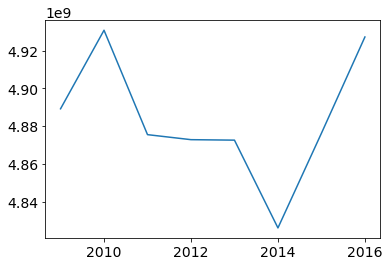

In [27]:
df = pd.read_csv("total_sc_N_soil_min_station.csv")
df2 = df["N_soil_min[kgNha-1]"].groupby(df.year, axis=0).sum(axis=0) 
plt.plot(df2)
plt.grid

In [31]:
df = pd.read_csv("rate_sc_C_soil_min_station.csv")
df

,year,id,C_soil_min[kgCha-1]
0,2009,0,128351.400000
1,2009,1,132031.200000
2,2009,2,136827.200000
3,2009,3,136827.200000
4,2009,4,136827.200000
...,...,...,...
8739,2016,1515,147867.180624
8740,2016,1516,147867.180624
8741,2016,1522,137104.458672
8742,2016,1523,137104.458672


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

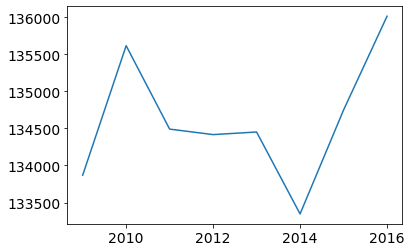

In [36]:
df2 = df["C_soil_min[kgCha-1]"].groupby(df.year).mean() 
plt.plot(df2)
plt.grid

In [ ]:
cmap(np.array([0, 1, 2, 3, 7,  6,  5,  4]))

In [ ]:
df = pd.read_csv("rate_sc_N_soil_min_era5.csv")
plt.plot(df["N_soil_min[kgNha-1]"].groupby(df["year"]).mean())
plt.show()

In [ ]:
df = pd.read_csv("rate_sc_C_soil_min_era5.csv")
plt.plot(df["C_soil_min[kgCha-1]"].groupby(df["year"]).mean())
plt.show()

In [ ]:
!ls -l *depos*

In [ ]:
df = pd.read_csv("rate_es_aN_deposition_era5.csv")
df
plt.plot(df["aN_deposition[kgNha-1]"].groupby(df["year"]).mean())
plt.show()